In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/NLP-movie-review.csv')

In [3]:
df.head()

,review,reaction
0,Service is friendly and inviting.,1
1,Awesome service and food.,1
2,Waitress was a little slow in service.,0
3,"Come hungry, leave happy and stuffed!",1
4,Horrible - don't waste your time and money.,0


In [4]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0],df.shape[1]))

There are 1000 rows and 2 columns in the dataset


# **Data Preprocessing**

Here in this output, we can see that we are having 1000 rows and 2 columns in the dataset. Now let’s further check the, missing values for that we can use the isnull() function to check for missing values in the dataset

In [5]:
df.isnull().sum()

review      0
reaction    0
dtype: int64

In [6]:
df.reaction.value_counts()

1    500
0    500
Name: reaction, dtype: int64

In the target variable of the dataset, we are having values of 1 and 0. So let us manipulate the value of 1 to positive and 0 to negative.

In [7]:
df['reaction'].replace(to_replace=1,value='positive',inplace=True)
df['reaction'].replace(to_replace=0,value='negative',inplace=True)

In [8]:
df.head()

,review,reaction
0,Service is friendly and inviting.,positive
1,Awesome service and food.,positive
2,Waitress was a little slow in service.,negative
3,"Come hungry, leave happy and stuffed!",positive
4,Horrible - don't waste your time and money.,negative


# **Vectorizing the data**

Converting textual data into numerical features is termed vectorization, similar to performing encoding in machine learning. 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(lowercase=True,stop_words='english',token_pattern='\w+')
X = tf_idf.fit_transform(df['review'].values)

Here the Term Frequency -Inverse Document Frequency library of the sklearn module is used to vectorize the textual data where all the text preprocessing steps are fed into the TF-IDF vectorizer instance by stating lower case conversion as True, mentioning stop words as English and the tokenization pattern as \w+ is used to match all the characters in the dataset ranging from (a-z) and (A-Z).

For easy interpretation let us convert the vectorized data frame into a pandas dataframe as shown below and compute the vocabulary length which is the number of rows in the vectorized dataframe.

In [16]:
X = pd.DataFrame(X,columns=tf_idf.get_feature_names_out())
print('Vocabulary length of count-vectorized data',len(X))

Vocabulary length of count-vectorized data 1000


In [17]:
X

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here in the vectorized data frame, we can see that it has 1000 rows and the TF-IDF vectorizer has vectorized 1832 textual features.

# **Splitting data into train and test**

In [18]:
from sklearn.model_selection import train_test_split

Let us separate the target variable from the dataset

In [19]:
y=df['reaction']

In [20]:
#Creating training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [21]:
#Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 1832)
(700,)
(300, 1832)
(300,)


# **Building Multinomial Naive Bayes Model**

As the TF-IDF model represents the table of independent word frequencies so to tackle this behaviour a Multinomial Naive Bayes would perform well due to its assumption related to features. Let us import the Multinomial Naive Bayes library of the scikit learn module as shown below.

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
mnb_mod=MultinomialNB()
mnb_model=mnb_mod.fit(X_train,y_train)

In [24]:
mnb_pred=mnb_model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [26]:
print('Accuracy Score of Multinomial Naive Bayes model : {}'.format(accuracy_score(y_test,mnb_pred)))

Accuracy Score of Multinomial Naive Bayes model : 0.7266666666666667


In [27]:
print('Classification Report of Multinomial Naive Bayes model : \n ',classification_report(y_test,mnb_pred))

Classification Report of Multinomial Naive Bayes model : 
                precision    recall  f1-score   support

    negative       0.78      0.64      0.71       152
    positive       0.69      0.81      0.75       148

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.72       300



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


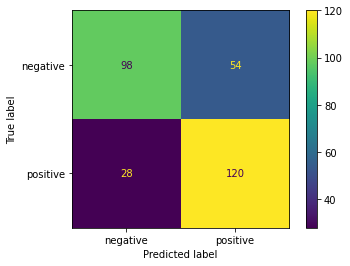

In [28]:
plot_confusion_matrix(mnb_model,X_test,y_test)
#plt.show()

# **Obtaining predictions from the MNB model**

Let us create a user-defined function to obtain predictions from the multinomial naive Bayes model as shown below

In [30]:
def pred():
  text_sent=input()
  trans=tf_idf.transform([text_sent])
  pred=mnb_model.predict(trans)
  return pred
print('Prediction',pred())

nice food
Prediction ['positive']
